<a href="https://colab.research.google.com/github/dr4carys/bangkitTrainModel/blob/master/trainModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import adagrad
from sklearn.metrics import classification_report
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [5]:
MesinKlasifikasi = Sequential()
 
MesinKlasifikasi.add(Conv2D(filters = 32, kernel_size=(3, 3), input_shape = (128, 128, 3), activation = 'relu'))
 
MesinKlasifikasi.add(MaxPooling2D(pool_size = (2, 2)))

MesinKlasifikasi.add(Conv2D(32, (3, 3), activation = 'relu'))
MesinKlasifikasi.add(MaxPooling2D(pool_size = (2, 2)))

MesinKlasifikasi.add(Flatten())
MesinKlasifikasi.add(Dense(units = 128, activation = 'relu'))
MesinKlasifikasi.add(Dense(units = 1, activation = 'sigmoid'))
opt2 = adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
opt1 =Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
opt = SGD(lr=0.001, momentum=0.9)
MesinKlasifikasi.compile(optimizer = opt2, loss = 'binary_crossentropy', metrics = ['accuracy'])
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
 
test_datagen = ImageDataGenerator(rescale = 1./255)
 
training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/bangkit dataset/Train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
 
test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/bangkit dataset/Test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')
 
history=MesinKlasifikasi.fit_generator(training_set,
                         steps_per_epoch = 109/32,
                         epochs = 200,
                         validation_data = test_set,
                         validation_steps = 49/32,
                         shuffle=True)

Found 109 images belonging to 2 classes.
Found 41 images belonging to 2 classes.
Epoch 1/200
4/3 [===================================] - 3s 755ms/step - loss: 22.2510 - accuracy: 0.5229 - val_loss: 1.2916 - val_accuracy: 0.4878
Epoch 2/200
4/3 [===================================] - 3s 724ms/step - loss: 1.6519 - accuracy: 0.4954 - val_loss: 0.6956 - val_accuracy: 0.5122
Epoch 3/200
4/3 [===================================] - 3s 686ms/step - loss: 1.7047 - accuracy: 0.5872 - val_loss: 0.5121 - val_accuracy: 0.5122
Epoch 4/200
4/3 [===================================] - 3s 737ms/step - loss: 0.6600 - accuracy: 0.6055 - val_loss: 0.6987 - val_accuracy: 0.5610
Epoch 5/200
4/3 [===================================] - 3s 672ms/step - loss: 0.6483 - accuracy: 0.6330 - val_loss: 0.5657 - val_accuracy: 0.6341
Epoch 6/200
4/3 [===================================] - 3s 697ms/step - loss: 0.7984 - accuracy: 0.5963 - val_loss: 0.6274 - val_accuracy: 0.5366
Epoch 7/200
4/3 [=========================

In [6]:
model_json = MesinKlasifikasi.to_json()
with open("/content/gdrive/My Drive/Model/model200epochbaru.json", "w") as json_file:
    json_file.write(model_json)
MesinKlasifikasi.save_weights("/content/gdrive/My Drive/Model/model200epochbaru.h5")
print("Saved model to disk")

Saved model to disk


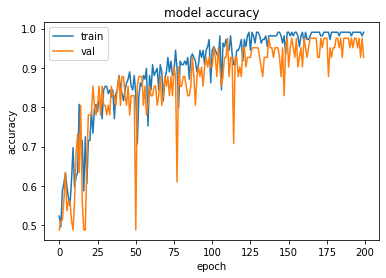

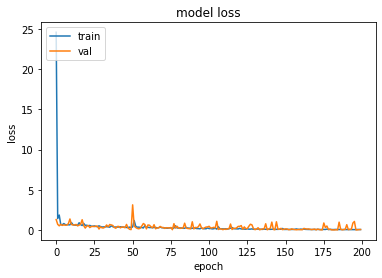

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


# New section